#Severidad de los ataques de ansiedad en personas adultas
##Introducción
La ansiedad es uno de los trastornos mentales más prevalentes a nivel mundial. Según la Organización Mundial de la Salud (OMS), más de 300 millones de personas en el mundo padecen de un trastorno de ansiedad, lo que representa aproximadamente el 4% de la población mundial. Este trastorno tiene un impacto significativo en la vida diaria, no solo a nivel emocional y psicológico, sino también en la salud física, ya que los ataques de ansiedad pueden generar síntomas como taquicardia, dificultad para respirar, sudoración excesiva y mareos.

Dentro del espectro de los trastornos de ansiedad, los ataques de ansiedad o pánico son de particular preocupación, ya que pueden ser incapacitantes y ocurrir sin previo aviso. Estos episodios pueden tener diferentes niveles de intensidad, y su severidad varía entre los individuos. Predecir la severidad de estos ataques de ansiedad es crucial para diseñar intervenciones más efectivas que no solo gestionen el trastorno, sino que también mitiguen sus consecuencias inmediatas y a largo plazo.

El objetivo de este análisis es precisamente entender los factores que influyen en la severidad de los ataques de ansiedad y desarrollar un modelo predictivo que permita prever qué tan grave puede ser un ataque en función de ciertas variables. A través de la ciencia de datos, se espera encontrar patrones en un conjunto de datos que incluye información sobre hábitos de vida, antecedentes familiares, y respuestas fisiológicas que podrían estar relacionados con la intensidad de los episodios de ansiedad.

Este modelo puede ser una herramienta de soporte para los profesionales de la salud mental e investigadores del rubro, brindando la posibilidad de realizar una detección temprana de la severidad de un ataque de ansiedad. Identificar qué factores están más fuertemente asociados con ataques más graves puede permitir a los profesionales de la salud implementar intervenciones más específicas y oportunas.

Además, el modelo ayudará a personalizar los tratamientos para cada individuo, teniendo en cuenta su perfil particular. Por ejemplo, si se identifica que el consumo de cafeína y el estrés son factores clave en la severidad de los ataques, se podrían recomendar cambios en los hábitos de vida para prevenir episodios más graves.

A nivel economico, predecir con mayor facilidad qué personas podrían enfrentar ataques más graves permitiria a los profesionales de la salud poder centrar sus esfuerzos en aquellas personas que realmente lo necesiten, mejorando la eficiencia en el uso de recursos limitados.

Por último, este análisis proporciona la base para generar concienciación y educación sobre los factores de riesgo asociados con los ataques de ansiedad, brindando a la sociedad herramientas para identificar y manejar estos factores de forma más efectiva.

##Selección del dataset
El análisis se basa en un conjunto de datos que contiene más de 12,000 registros, lo que ofrece una muestra representativa para explorar cómo diversas variables pueden influir en la severidad de un ataque de ansiedad. Este dataset incluye información sobre:

1. **Edad:** Edad en años de la persona.
2. **Género:** Sexo de la persona (Femenino, Masculino).
3. **Ocupación:** Tipo de empleo o profesión.
4. **Horas de sueño:** Promedio de horas de sueño por noche.
5. **Actividad física (horas/semana):** Horas dedicadas a actividad física semanal.
6. **Consumo de cafeína (mg/día):** Cantidad de cafeína consumida diariamente.
7. **Consumo de alcohol (bebidas/semana):** Número de bebidas alcohólicas consumidas por semana.
8. **Tabaquismo:** Estado de consumo de tabaco (Sí/No).
9. **Antecedentes familiares de ansiedad:** Historial de trastornos de ansiedad en la familia (Sí/No).
10. **Nivel de estrés (1-10):** Autoevaluación del nivel de estrés.
11. **Frecuencia cardíaca (ppm durante ataque):** Frecuencia cardíaca durante un ataque de ansiedad.
12. **Frecuencia respiratoria (respiraciones/minuto):** Número de respiraciones por minuto durante un ataque de ansiedad.
13. **Nivel de sudoración (1-5):** Autoevaluación del nivel de sudoración.
14. **Mareos:** Presencia de mareos durante el ataque (Sí/No).
15. **Medicación:** Uso de medicación para la ansiedad (Sí/No).
16. **Sesiones de terapia (por mes):** Número de sesiones de terapia psicológica recibidas por mes.
17. **Eventos vitales recientes:** Experiencias recientes de eventos significativos en la vida (Sí/No).
18. **Calidad de la dieta (1-10):** Autoevaluación de la calidad de la dieta.
19. **Severidad del ataque de ansiedad (1-10):** Evaluación de la severidad del ataque de ansiedad en una escala del 1 al 10 (variable objetivo).


##Objetivos
###Objetivo General
Predecir la severidad del ataque de ansiedad en adultos en base a datos fisiologicos, demograficos y estilo de vida.

##Hipotesis
¿La severidad de los ataques de ansiedad varía según la edad y el género de los individuos?

¿A mayor nivel de estrés y menor calidad del sueño estén relacionados con una mayor severidad de los ataques de ansiedad?

¿La frecuencia cardíaca y la frecuencia respiratoria durante un ataque de ansiedad pueden predictores significativos de la severidad de dicho ataque?

¿Puede que la intervención médica (medicación y terapia) reduzca la severidad de los ataques de ansiedad?


#Data Wrangling


##Revision del dataset


###Carga de dataset y primera vista

In [163]:
#Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Any

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, make_scorer, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [164]:
#Carga del dataset desde GitHub
url = 'https://raw.githubusercontent.com/nohespnza/DS_II_Espinoza_Entrega_I/refs/heads/main/anxiety_attack_dataset.csv'
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 12000 non-null  int64  
 1   Age                                12000 non-null  int64  
 2   Gender                             12000 non-null  object 
 3   Occupation                         12000 non-null  object 
 4   Sleep Hours                        12000 non-null  float64
 5   Physical Activity (hrs/week)       12000 non-null  float64
 6   Caffeine Intake (mg/day)           12000 non-null  int64  
 7   Alcohol Consumption (drinks/week)  12000 non-null  int64  
 8   Smoking                            12000 non-null  object 
 9   Family History of Anxiety          12000 non-null  object 
 10  Stress Level (1-10)                12000 non-null  int64  
 11  Heart Rate (bpm during attack)     12000 non-null  int

In [165]:
df.shape

(12000, 20)

Revision de head, tail y un sample de 5 lineas para conocer el dataset

In [166]:
df.head(5)

,ID,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
0,1,56,Female,Other,9.6,8.3,175,6,No,No,4,145,33,3,No,No,4,Yes,9,10
1,2,46,Male,Teacher,6.4,7.3,97,6,No,No,3,143,18,5,Yes,No,0,No,9,8
2,3,32,Female,Doctor,6.9,1.0,467,14,No,No,2,60,34,1,No,No,7,Yes,10,5
3,4,60,Male,Doctor,9.2,3.7,471,16,No,Yes,6,94,19,1,No,Yes,4,Yes,5,8
4,5,25,Male,Student,9.2,2.5,364,2,No,Yes,7,152,15,4,No,Yes,0,No,1,1


In [167]:
df.sample(5)

,ID,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
5966,5967,27,Male,Engineer,7.9,1.8,12,13,No,No,3,123,13,1,No,No,5,No,1,9
145,146,30,Male,Doctor,8.2,5.5,222,13,No,No,1,143,33,3,Yes,No,3,Yes,2,10
10132,10133,25,Male,Student,5.9,8.8,138,13,Yes,No,6,100,12,1,No,No,2,No,6,7
3695,3696,24,Female,Engineer,7.8,9.9,245,10,Yes,No,4,106,35,3,No,No,0,Yes,10,7
5652,5653,47,Male,Student,6.8,7.5,383,11,No,Yes,5,170,31,3,No,Yes,0,No,10,10


In [168]:
df.tail(5)

,ID,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
11995,11996,28,Male,Engineer,4.4,4.1,360,1,Yes,Yes,1,139,20,2,Yes,No,7,No,9,6
11996,11997,49,Female,Doctor,9.9,2.2,433,4,No,Yes,4,150,33,2,No,No,3,No,5,6
11997,11998,23,Female,Student,9.8,8.1,140,19,Yes,No,2,81,33,2,No,No,8,No,1,10
11998,11999,52,Male,Teacher,5.9,6.6,114,12,No,No,9,90,14,5,No,No,3,No,9,5
11999,12000,50,Male,Teacher,6.6,7.8,114,0,No,No,7,107,19,2,No,Yes,3,No,8,2


In [169]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,12000.0,6000.500000,3464.245950,1.0,3000.75,6000.5,9000.250,12000.0
Age,12000.0,40.966750,13.473280,18.0,29.00,41.0,53.000,64.0
Sleep Hours,12000.0,6.482650,2.014885,3.0,4.80,6.5,8.200,10.0
Physical Activity (hrs/week),12000.0,5.030892,2.889000,0.0,2.50,5.0,7.525,10.0
Caffeine Intake (mg/day),12000.0,246.696083,144.487071,0.0,122.00,244.0,371.000,499.0
Alcohol Consumption (drinks/week),12000.0,9.492833,5.769364,0.0,5.00,9.0,15.000,19.0
Stress Level (1-10),12000.0,5.462250,2.897201,1.0,3.00,5.0,8.000,10.0
Heart Rate (bpm during attack),12000.0,119.398500,34.806711,60.0,89.00,119.0,149.000,179.0
Breathing Rate (breaths/min),12000.0,25.462333,8.090686,12.0,18.00,25.0,32.000,39.0
Sweating Level (1-5),12000.0,2.987417,1.414482,1.0,2.00,3.0,4.000,5.0


Para tener un primer vistazo de los datos (composicion, concentracion, moda, mediana, media) se ejecuta el describe para las variables numericas y luego para las categoricas de tipo string

In [170]:
df.describe(include='object')

,Gender,Occupation,Smoking,Family History of Anxiety,Dizziness,Medication,Recent Major Life Event
count,12000,12000,12000,12000,12000,12000,12000
unique,3,6,2,2,2,2,2
top,Female,Unemployed,No,No,No,No,No
freq,5809,2139,8417,7179,8406,9605,9054


###Revision de nulos, columnas duplicadas, outliners y estandarización de datos


In [171]:
df.isnull().sum()

,0
ID,0
Age,0
Gender,0
Occupation,0
Sleep Hours,0
Physical Activity (hrs/week),0
Caffeine Intake (mg/day),0
Alcohol Consumption (drinks/week),0
Smoking,0
Family History of Anxiety,0


In [172]:
df.duplicated().sum()

np.int64(0)

<ipython-input-173-c697113a9461>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot( y=variable, data=df, ax=ax,palette="flare")
<ipython-input-173-c697113a9461>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot( y=variable, data=df, ax=ax,palette="flare")
<ipython-input-173-c697113a9461>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot( y=variable, data=df, ax=ax,palette="flare")
<ipython-input-173-c697113a9461>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the

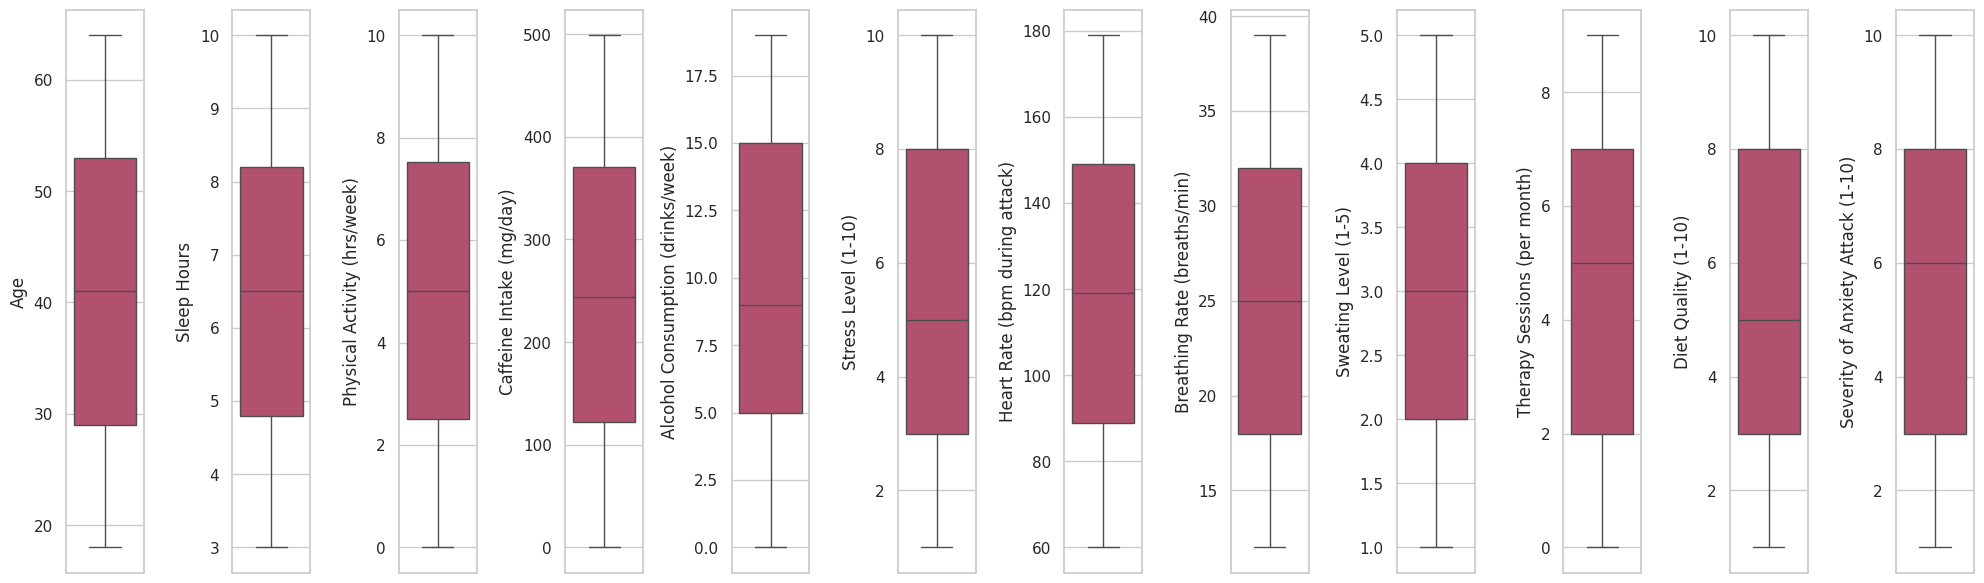

In [173]:
variables = ['Age', 'Sleep Hours',
             'Physical Activity (hrs/week)', 'Caffeine Intake (mg/day)', 'Alcohol Consumption (drinks/week)', 'Stress Level (1-10)',
             'Heart Rate (bpm during attack)','Breathing Rate (breaths/min)', 'Sweating Level (1-5)','Therapy Sessions (per month)','Diet Quality (1-10)','Severity of Anxiety Attack (1-10)']

fig, axes = plt.subplots(1, len(variables), figsize=(20,6))

for ax, variable in zip(axes, variables):
    ax = sns.boxplot( y=variable, data=df, ax=ax,palette="flare")
plt.tight_layout()

In [174]:
for col in df.columns:
  print(f"Valores unicos en '{col}': {df[col].unique()}")

Valores unicos en 'ID': [    1     2     3 ... 11998 11999 12000]
Valores unicos en 'Age': [56 46 32 60 25 38 36 40 28 41 53 57 20 39 19 61 47 55 50 29 42 44 59 45
 33 64 54 24 26 35 21 31 43 37 52 34 23 51 27 48 62 58 18 22 30 49 63]
Valores unicos en 'Gender': ['Female' 'Male' 'Other']
Valores unicos en 'Occupation': ['Other' 'Teacher' 'Doctor' 'Student' 'Unemployed' 'Engineer']
Valores unicos en 'Sleep Hours': [ 9.6  6.4  6.9  9.2  6.7  3.8  4.9  6.2  8.3  8.   7.5  8.6  9.9  4.4
  3.4  5.9  7.3  9.   5.3  9.4  6.3  3.1  4.1  3.7  3.3  4.3  8.9  3.2
  8.7  7.2  5.4  5.6  6.6  7.   9.3  4.5  9.5  8.8  4.8  9.7  4.   7.1
 10.   5.   5.2  6.5  9.8  8.5  5.8  7.4  7.6  5.7  5.5  6.1  4.6  6.8
  7.7  8.1  8.2  9.1  3.6  3.   8.4  5.1  4.7  7.8  6.   4.2  3.9  3.5
  7.9]
Valores unicos en 'Physical Activity (hrs/week)': [ 8.3  7.3  1.   3.7  2.5  9.9  7.5  0.5  9.   9.3  3.3  6.4  6.8  6.9
  5.6  9.5  5.1  1.1  0.8  0.2  4.3  2.7  8.7  8.4  3.   3.1  0.9  9.2
  6.2  1.3  2.1  4.5  7.   5.

Este dataset no necesita acciones de estandarizacion ni manejo de nulos, la unica accion necesaria es eliminar la columna de ID.

In [175]:
df=df.drop(df.columns[0], axis=1)
df

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
0,56,Female,Other,9.6,8.3,175,6,No,No,4,145,33,3,No,No,4,Yes,9,10
1,46,Male,Teacher,6.4,7.3,97,6,No,No,3,143,18,5,Yes,No,0,No,9,8
2,32,Female,Doctor,6.9,1.0,467,14,No,No,2,60,34,1,No,No,7,Yes,10,5
3,60,Male,Doctor,9.2,3.7,471,16,No,Yes,6,94,19,1,No,Yes,4,Yes,5,8
4,25,Male,Student,9.2,2.5,364,2,No,Yes,7,152,15,4,No,Yes,0,No,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,28,Male,Engineer,4.4,4.1,360,1,Yes,Yes,1,139,20,2,Yes,No,7,No,9,6
11996,49,Female,Doctor,9.9,2.2,433,4,No,Yes,4,150,33,2,No,No,3,No,5,6
11997,23,Female,Student,9.8,8.1,140,19,Yes,No,2,81,33,2,No,No,8,No,1,10
11998,52,Male,Teacher,5.9,6.6,114,12,No,No,9,90,14,5,No,No,3,No,9,5


#Graficos - Explorando los datos


En prinicipio se presentan graficos univariados de todas las variables, tanto categoricas como numericas para observar la distribucion de las mismas asi como tambien, el balance dentro de la variable objetivo.

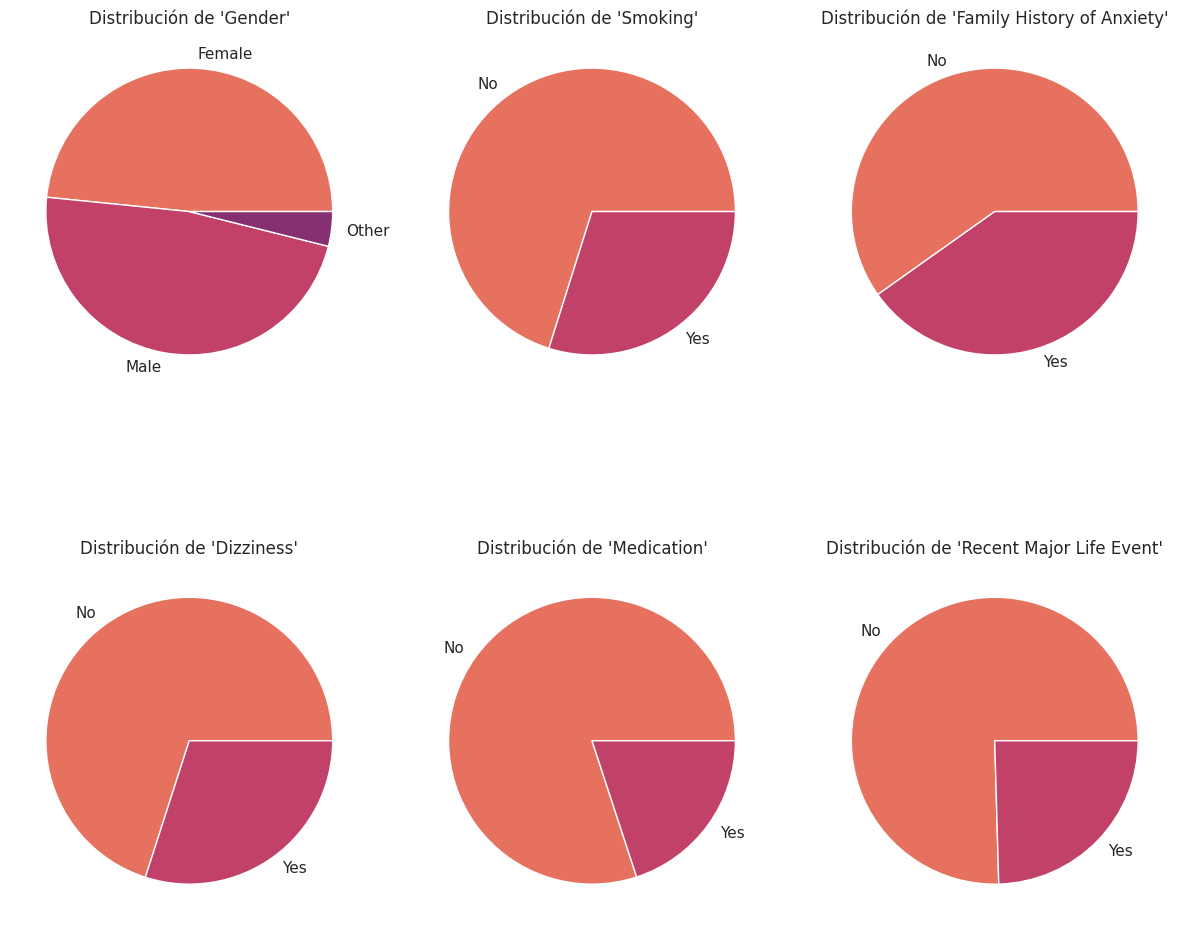

In [176]:
columnas_categoricas = ['Gender', 'Smoking', 'Family History of Anxiety',
                         	'Dizziness',	'Medication',	'Recent Major Life Event']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 12))
axes = axes.flatten()

palette = sns.color_palette("flare", len(df['Gender'].unique()))

# Graficar la distribución de valores únicos en cada columna categórica
for i, columna in enumerate(columnas_categoricas):
  axes[i].pie(df[columna].value_counts(), labels=df[columna].value_counts().index,colors=palette)
  axes[i].set_title(f"Distribución de '{columna}'")

plt.tight_layout()
plt.show()

<ipython-input-177-5a242ffb78c9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(y=df['Occupation'], palette="flare")


Text(0, 0.5, 'Occupation')

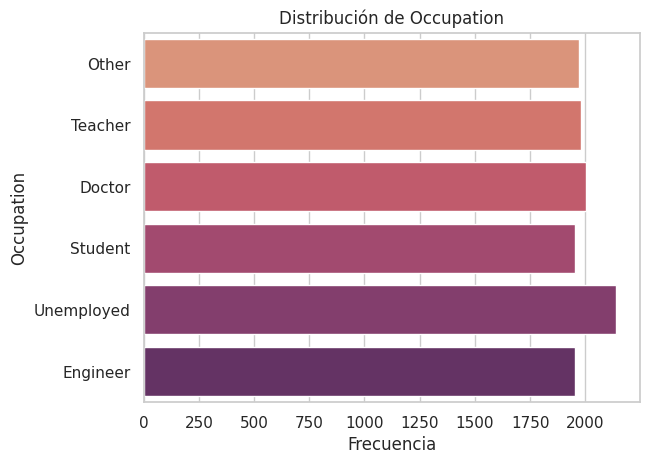

In [177]:
ax=sns.countplot(y=df['Occupation'], palette="flare")
ax.set_title("Distribución de Occupation")
ax.set_xlabel("Frecuencia")
ax.set_ylabel("Occupation")

<ipython-input-178-897f25f663cd>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[columna], ax=axes[i], palette="flare")
<ipython-input-178-897f25f663cd>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[columna], ax=axes[i], palette="flare")
<ipython-input-178-897f25f663cd>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[columna], ax=axes[i], palette="flare")
<ipython-input-178-897f25f663cd>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variabl

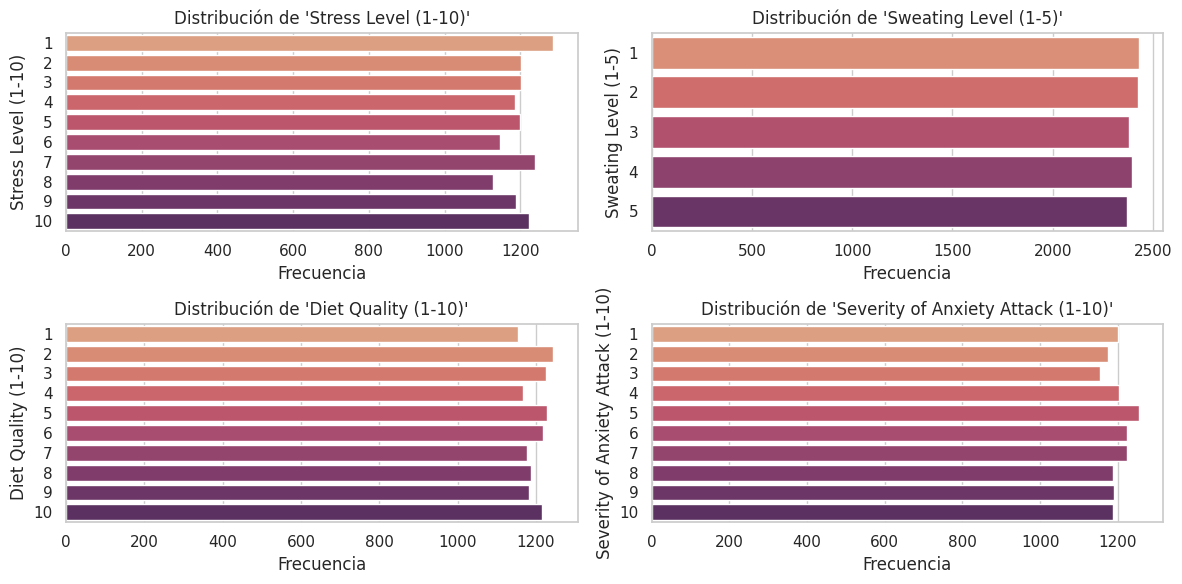

In [178]:
columnas_categoricas_numericas = ['Stress Level (1-10)', 'Sweating Level (1-5)', 'Diet Quality (1-10)', 'Severity of Anxiety Attack (1-10)']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
axes = axes.flatten()

# Graficar la distribución de valores únicos en cada columna categórica
for i, columna in enumerate(columnas_categoricas_numericas):
    sns.countplot(y=df[columna], ax=axes[i], palette="flare")
    axes[i].set_title(f"Distribución de '{columna}'")
    axes[i].set_xlabel("Frecuencia")
    axes[i].set_ylabel(columna)

plt.tight_layout()
plt.show()

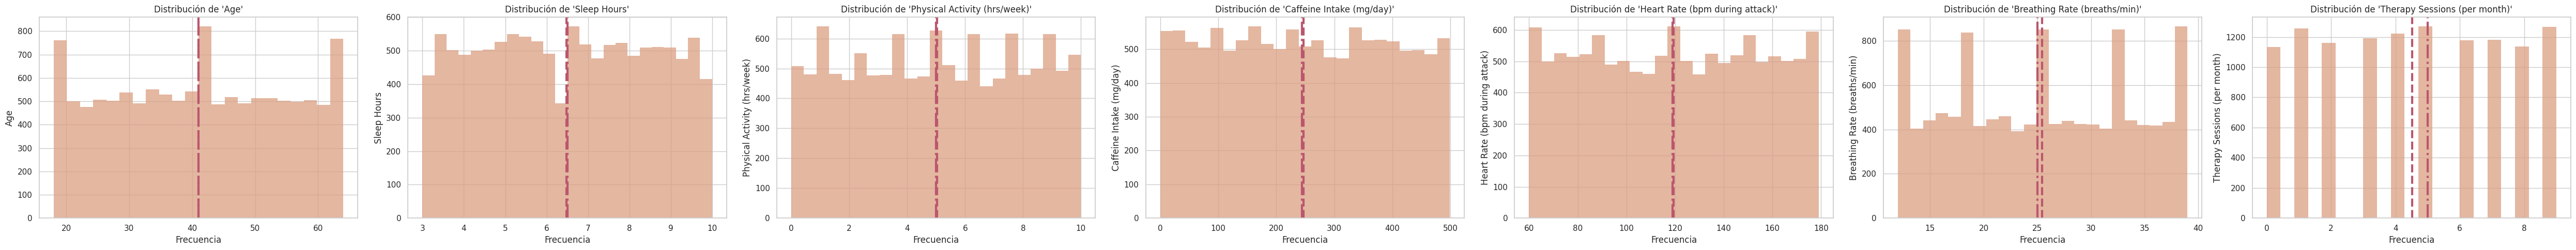

In [179]:

columnas_numericas = ['Age', 'Sleep Hours',
                      'Physical Activity (hrs/week)', 'Caffeine Intake (mg/day)',
                      'Heart Rate (bpm during attack)','Breathing Rate (breaths/min)', 'Therapy Sessions (per month)']

fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(50, 5))
axes = axes.flatten()

palette = sns.color_palette("flare", len(df['Age'].unique()))

# Graficar la distribución en cada columna
for i, columna in enumerate(columnas_numericas):
  media_ = df[columna].mean()
  mediana_ = df[columna].median()
  sns.histplot(x=df[columna], ax=axes[i],color='#DC9F82', linewidth=0)
  axes[i].axvline(media_, color='#BB566D', linestyle='--', linewidth=3, label='Media')
  axes[i].axvline(mediana_, color='#BB566D', linestyle='-.', linewidth=3, label='Mediana')
  axes[i].set_title(f"Distribución de '{columna}'")
  axes[i].set_xlabel("Frecuencia")
  axes[i].set_ylabel(columna)

plt.tight_layout()
plt.show()

Se observa tanto en la variable objetivo como en el resto de las numericas una distribucion planicúrtica que, posiblemente dificulte la correlación bivariada que se presenta a continuacion en la matriz de correlacion.

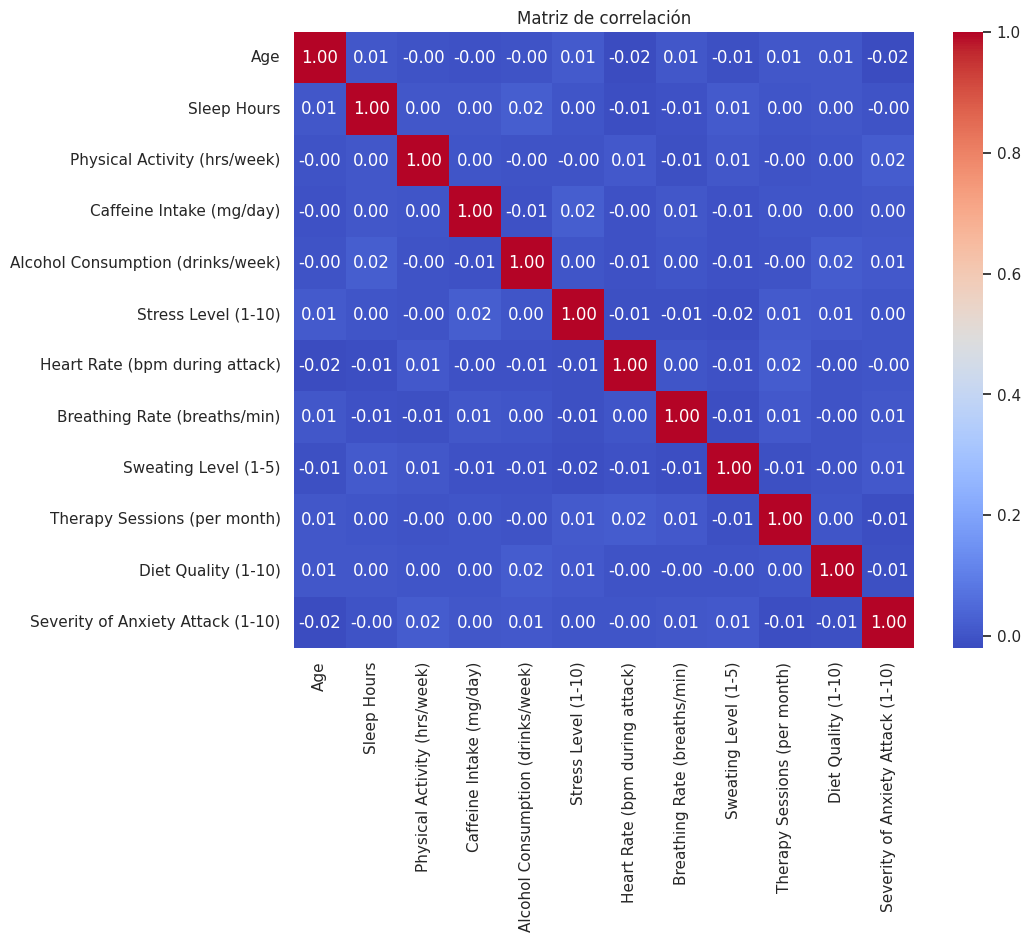

In [180]:
# Matriz de correlación
corr_matrix = df.corr(numeric_only=True)


# Visualizar con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de correlación")
plt.show()

Dentro de la matriz de correlacion no se observa correlacion bivariada entre las variables numericas, en consecuencia, se procede a realizar algunos graficos de calor con variable especificas para conocer si exite una concentracion mayor en algun punto entre dos variables.

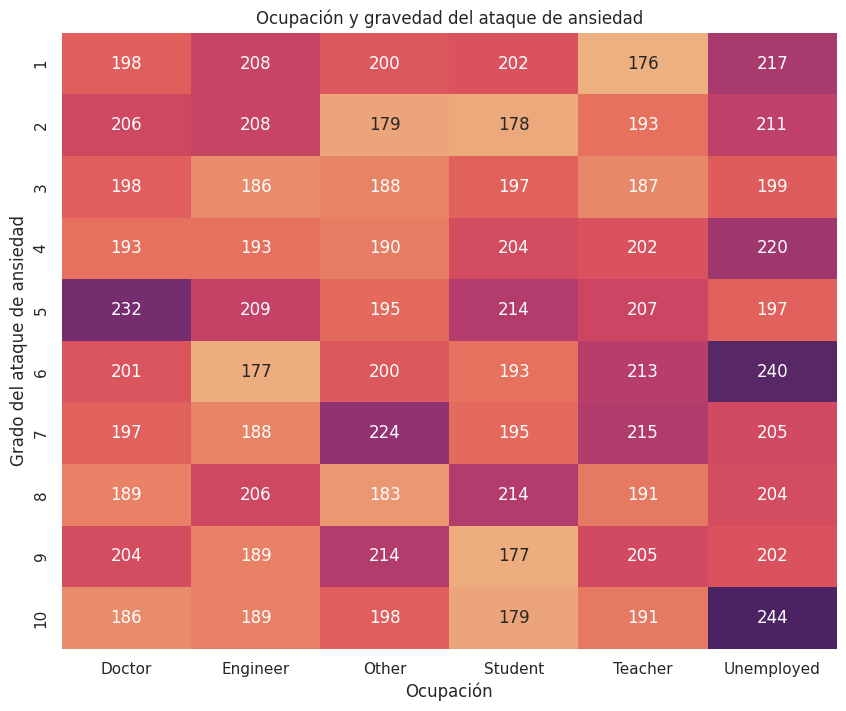

In [181]:
plt.figure(figsize=(10, 8))

heatmap_data = df.pivot_table(index='Severity of Anxiety Attack (1-10)', columns='Occupation', aggfunc='size', fill_value=0)
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='flare', cbar=False)

plt.title('Ocupación y gravedad del ataque de ansiedad')
plt.xlabel('Ocupación')
plt.ylabel('Grado del ataque de ansiedad')

plt.show()

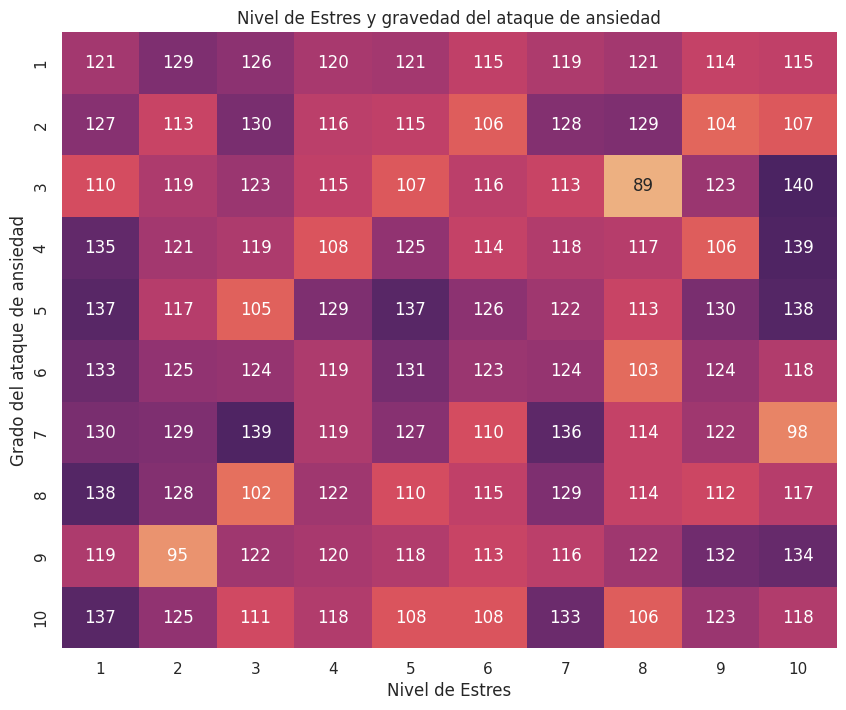

In [182]:
plt.figure(figsize=(10, 8))

heatmap_data = df.pivot_table(index='Severity of Anxiety Attack (1-10)', columns='Stress Level (1-10)', aggfunc='size', fill_value=0)
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='flare', cbar=False)

plt.title('Nivel de Estres y gravedad del ataque de ansiedad')
plt.xlabel('Nivel de Estres')
plt.ylabel('Grado del ataque de ansiedad')

plt.show()

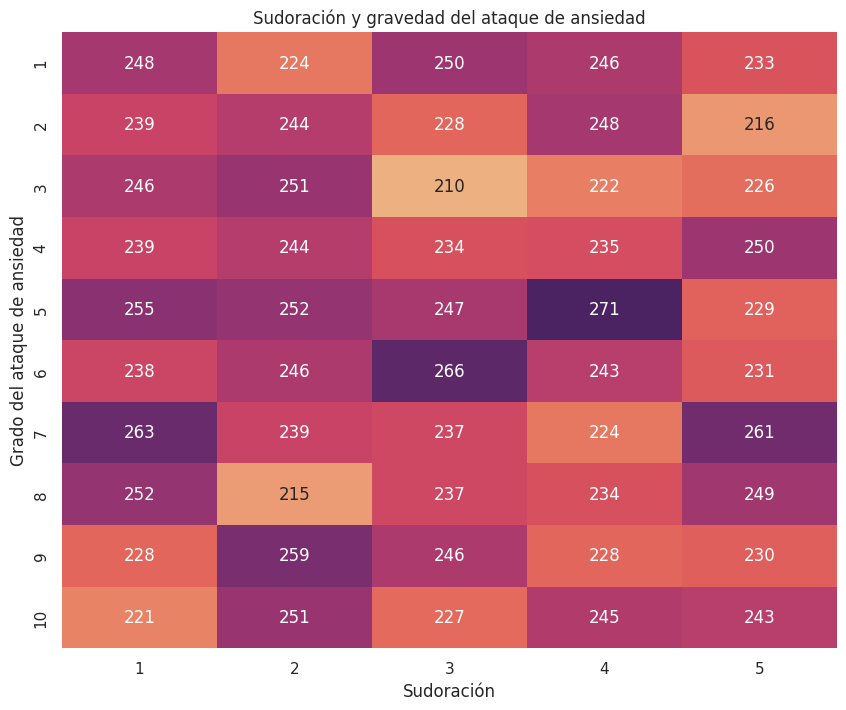

In [183]:
plt.figure(figsize=(10, 8))

heatmap_data = df.pivot_table(index='Severity of Anxiety Attack (1-10)', columns='Sweating Level (1-5)', aggfunc='size', fill_value=0)
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='flare', cbar=False)

plt.title('Sudoración y gravedad del ataque de ansiedad')
plt.xlabel('Sudoración')
plt.ylabel('Grado del ataque de ansiedad')

plt.show()

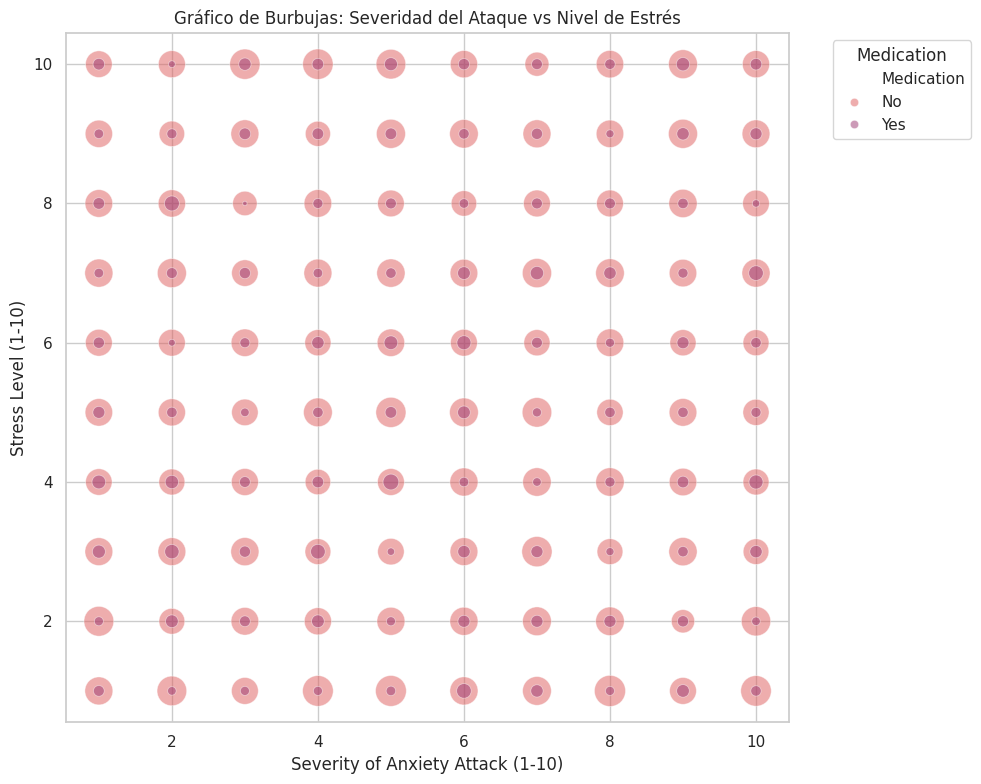

In [184]:
bubble_data = df.groupby(['Severity of Anxiety Attack (1-10)', 'Stress Level (1-10)', 'Medication']).size().reset_index(name='Count')

plt.figure(figsize=(10, 8))

s=sns.scatterplot(data=bubble_data, x='Severity of Anxiety Attack (1-10)',
                      y='Stress Level (1-10)',
                      size='Count', hue='Medication',palette='flare',
                      sizes=(10,500),
                      alpha=0.5)

handles, labels = s.get_legend_handles_labels()
new_handles = handles[:3]
new_labels = labels[:3]
plt.xlabel("Severity of Anxiety Attack (1-10)")
plt.ylabel("Stress Level (1-10)")
plt.title("Gráfico de Burbujas: Severidad del Ataque vs Nivel de Estrés")
plt.legend(new_handles, new_labels, title="Medication", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

Tras analizar diversos gráficos bivariados y multivariados, no se observa una correlación clara entre las variables. Esta falta de patrones evidentes sugiere que la relación entre los datos no es directamente lineal y que puede ser necesario aplicar técnicas de inferencia causal dentro del modelo de Machine Learning para obtener una mejor comprensión de las interacciones subyacentes.

En el contexto de la salud mental, este resultado es esperable, ya que los trastornos psicológicos no pueden definirse únicamente a partir de pruebas fisiológicas objetivas. Su diagnóstico y evolución dependen de una compleja interacción de factores internos, como la genética y la química cerebral, y factores externos, como el entorno social y las experiencias de vida.

<Figure size 1200x600 with 0 Axes>

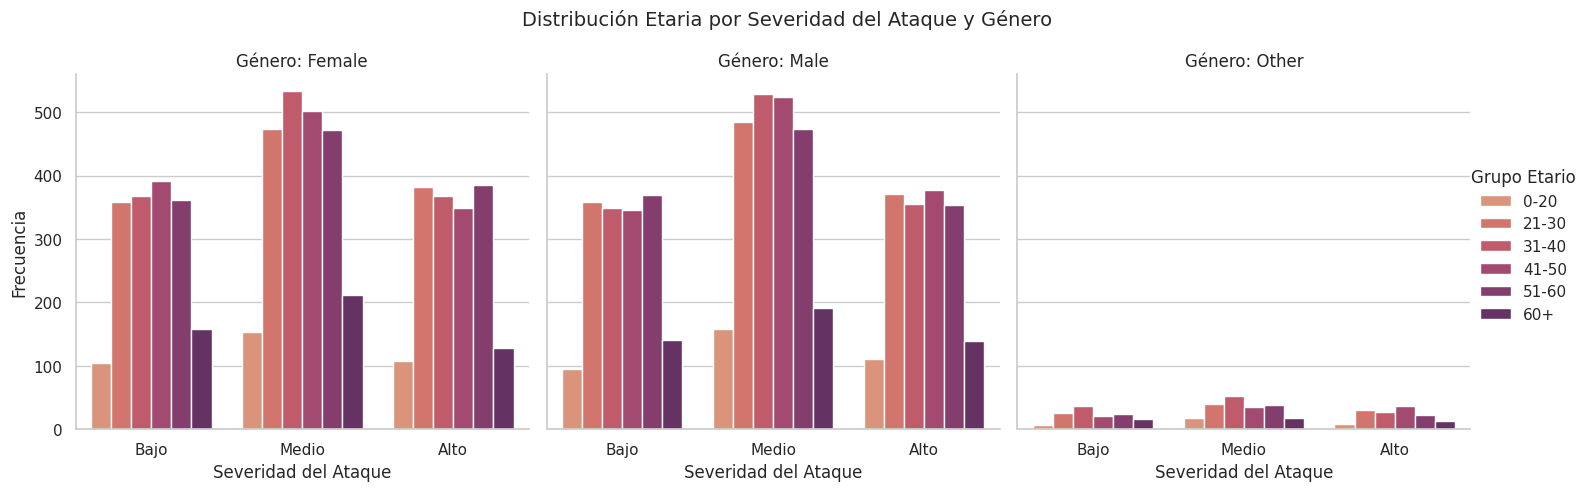

In [185]:
# Agrupar edad en rangos
df['Age_group'] = pd.cut(df['Age'],
                         bins=[0, 20, 30, 40, 50, 60, 100],
                         labels=['0-20', '21-30', '31-40', '41-50', '51-60', '60+'])

# Agrupar severidad en bajo, medio, alto
df['Severity_group'] = pd.cut(df['Severity of Anxiety Attack (1-10)'],
                              bins=[0, 3, 7, 10],
                              labels=['Bajo', 'Medio', 'Alto'])

# Contar frecuencias
severity_counts = df['Severity_group'].value_counts().sort_index()
age_counts = df['Age_group'].value_counts().sort_index()
gender_counts = df['Gender'].value_counts().sort_index()

# Unir en un DataFrame
comparison_df = pd.DataFrame({
    'Severidad': severity_counts,
    'Edad': age_counts,
    'Género': gender_counts
}).fillna(0)

# Crear una figura
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Paleta flare
palette = sns.color_palette("flare", n_colors=6)

# Añadir subagrupación por género separando gráficos (facetas)
g = sns.catplot(data=df,
                x='Severity_group',
                hue='Age_group',
                col='Gender',
                kind='count',
                palette=palette,
                height=5, aspect=1)

g.set_axis_labels("Severidad del Ataque", "Frecuencia")
g.set_titles("Género: {col_name}")
g._legend.set_title("Grupo Etario")
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Distribución Etaria por Severidad del Ataque y Género", fontsize=14)

plt.show()

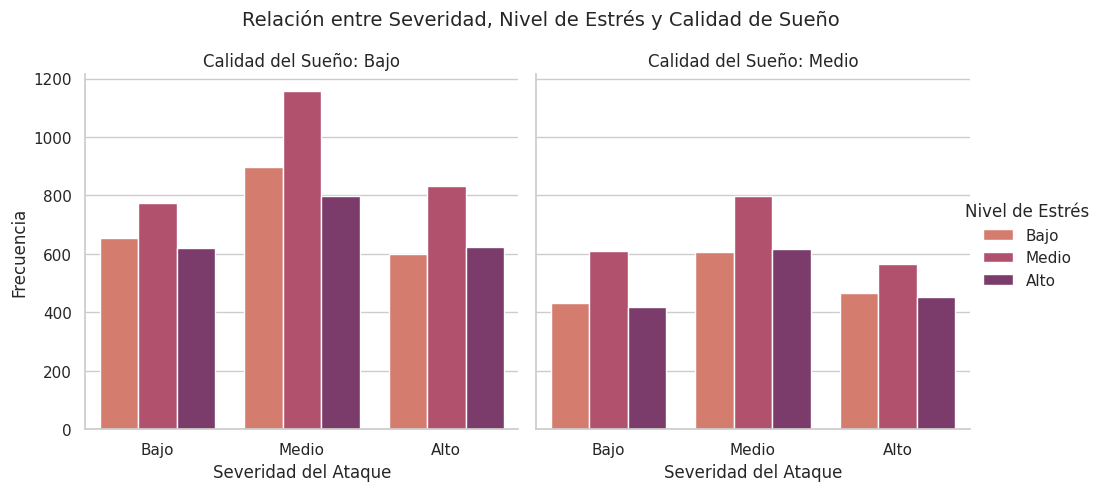

In [186]:
# Agrupar severidad
df['Severity_group'] = pd.cut(df['Severity of Anxiety Attack (1-10)'],
                              bins=[0, 3, 7, 10],
                              labels=['Bajo', 'Medio', 'Alto'])

# Agrupar nivel de estrés
df['Stress_group'] = pd.cut(df['Stress Level (1-10)'],
                            bins=[0, 3, 7, 10],
                            labels=['Bajo', 'Medio', 'Alto'])

# Agrupar calidad de sueño
df['Sleep_quality_group'] = pd.cut(df['Sleep Hours'],
                                   bins=[3, 7, 10],
                                   labels=['Bajo', 'Medio'])

# Paleta flare
palette = sns.color_palette("flare", n_colors=3)

# Crear gráfico: separación por calidad del sueño y color por nivel de estrés
g = sns.catplot(data=df,
                x='Severity_group',
                hue='Stress_group',
                col='Sleep_quality_group',
                kind='count',
                palette=palette,
                height=5, aspect=1)

g.set_axis_labels("Severidad del Ataque", "Frecuencia")
g.set_titles("Calidad del Sueño: {col_name}")
g._legend.set_title("Nivel de Estrés")
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Relación entre Severidad, Nivel de Estrés y Calidad de Sueño", fontsize=14)

plt.show()

<ipython-input-187-e2986458b7d0>:15: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  g = sns.catplot(data=df,


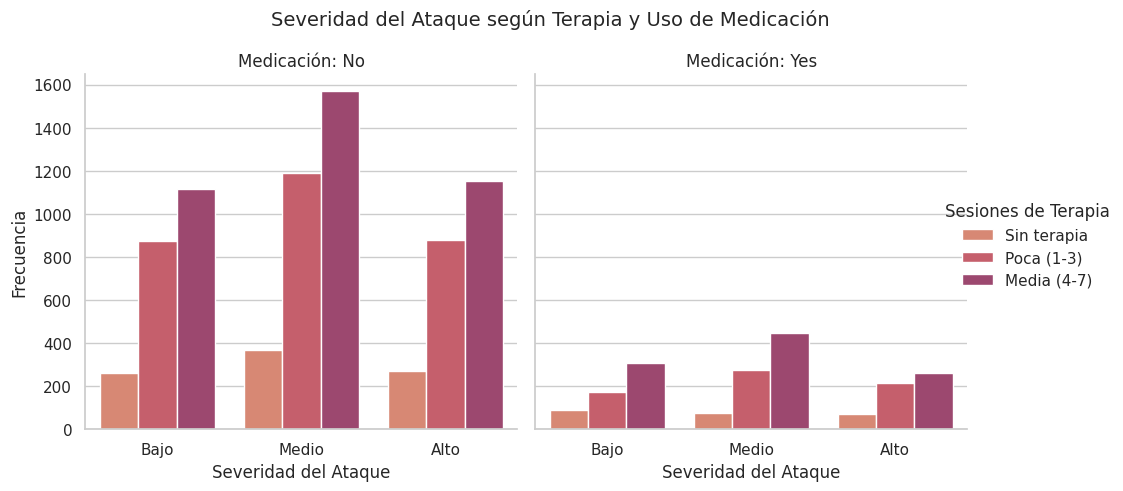

In [187]:
# Agrupar severidad
df['Severity_group'] = pd.cut(df['Severity of Anxiety Attack (1-10)'],
                              bins=[0, 3, 7, 10],
                              labels=['Bajo', 'Medio', 'Alto'])

# Agrupar terapias por mes
df['Therapy_group'] = pd.cut(df['Therapy Sessions (per month)'],
                              bins=[-1, 0, 3, 7],
                              labels=['Sin terapia', 'Poca (1-3)', 'Media (4-7)'])

# Paleta flare
palette = sns.color_palette("flare", n_colors=4)

# Gráfico: columnas por medicación, colores por terapia
g = sns.catplot(data=df,
                x='Severity_group',
                hue='Therapy_group',
                col='Medication',
                kind='count',
                palette=palette,
                height=5, aspect=1)

g.set_axis_labels("Severidad del Ataque", "Frecuencia")
g.set_titles("Medicación: {col_name}")
g._legend.set_title("Sesiones de Terapia")
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Severidad del Ataque según Terapia y Uso de Medicación", fontsize=14)

plt.show()

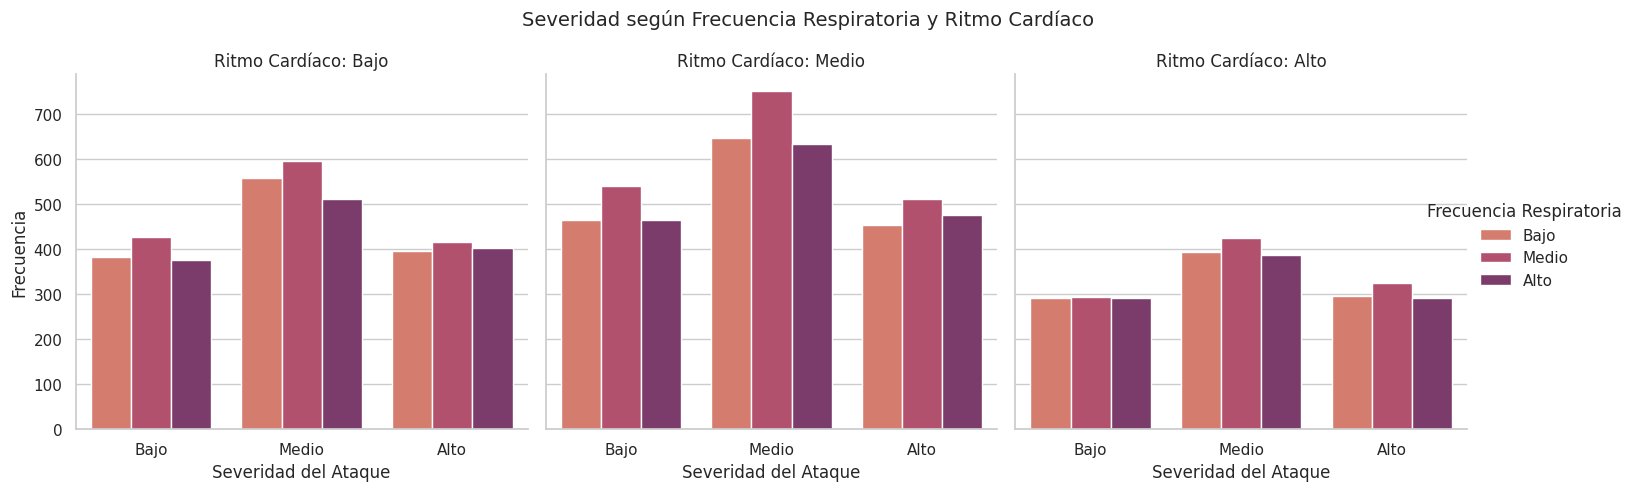

In [188]:
# Agrupar severidad
df['Severity_group'] = pd.cut(df['Severity of Anxiety Attack (1-10)'],
                              bins=[0, 3, 7, 10],
                              labels=['Bajo', 'Medio', 'Alto'])

# Agrupar frecuencia respiratoria
df['Breathing_group'] = pd.cut(df['Breathing Rate (breaths/min)'],
                                bins=[0, 20, 30, df['Breathing Rate (breaths/min)'].max()],
                                labels=['Bajo', 'Medio', 'Alto'])

# Agrupar ritmo cardíaco
df['Heart_group'] = pd.cut(df['Heart Rate (bpm during attack)'],
                            bins=[0, 99, 149, df['Heart Rate (bpm during attack)'].max()],
                            labels=['Bajo', 'Medio', 'Alto'])

# Paleta flare
palette = sns.color_palette("flare", n_colors=3)

# Gráfico: columnas por ritmo cardíaco, colores por grupo de respiración
g = sns.catplot(data=df,
                x='Severity_group',
                hue='Breathing_group',
                col='Heart_group',
                kind='count',
                palette=palette,
                height=5, aspect=1)

g.set_axis_labels("Severidad del Ataque", "Frecuencia")
g.set_titles("Ritmo Cardíaco: {col_name}")
g._legend.set_title("Frecuencia Respiratoria")
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Severidad según Frecuencia Respiratoria y Ritmo Cardíaco", fontsize=14)

plt.show()

#Modelado

##Modificacion del dataset para aplicar modelos

In [189]:
df=df.drop(df.columns[[19, 20, 21, 22, 23, 24, 25]], axis=1)

col = df.select_dtypes(include=['object']).columns

for i in col:
  label_col= df[i].unique()
  label_encoder = LabelEncoder()
  label_encoder.fit(label_col)
  df[i] = label_encoder.transform(df[i].astype(str))

df.head()

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
0,56,0,2,9.6,8.3,175,6,0,0,4,145,33,3,0,0,4,1,9,10
1,46,1,4,6.4,7.3,97,6,0,0,3,143,18,5,1,0,0,0,9,8
2,32,0,0,6.9,1.0,467,14,0,0,2,60,34,1,0,0,7,1,10,5
3,60,1,0,9.2,3.7,471,16,0,1,6,94,19,1,0,1,4,1,5,8
4,25,1,3,9.2,2.5,364,2,0,1,7,152,15,4,0,1,0,0,1,1


In [190]:
#Modificar datos de variable objetivo para ampliar el rango de asertividad, 0-6 para casos que necesiten seguimiento cercano y 6-10 para tomar accion inmediata
df['Severity of Anxiety Attack (1-10)']=df['Severity of Anxiety Attack (1-10)'].replace({1:0})
df['Severity of Anxiety Attack (1-10)']=df['Severity of Anxiety Attack (1-10)'].replace({2:0})
df['Severity of Anxiety Attack (1-10)']=df['Severity of Anxiety Attack (1-10)'].replace({3:0})
df['Severity of Anxiety Attack (1-10)']=df['Severity of Anxiety Attack (1-10)'].replace({4:0})
df['Severity of Anxiety Attack (1-10)']=df['Severity of Anxiety Attack (1-10)'].replace({5:0})
df['Severity of Anxiety Attack (1-10)']=df['Severity of Anxiety Attack (1-10)'].replace({6:0})
df['Severity of Anxiety Attack (1-10)']=df['Severity of Anxiety Attack (1-10)'].replace({7:1})
df['Severity of Anxiety Attack (1-10)']=df['Severity of Anxiety Attack (1-10)'].replace({8:1})
df['Severity of Anxiety Attack (1-10)']=df['Severity of Anxiety Attack (1-10)'].replace({9:1})
df['Severity of Anxiety Attack (1-10)']=df['Severity of Anxiety Attack (1-10)'].replace({10:1})
df.head()

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
0,56,0,2,9.6,8.3,175,6,0,0,4,145,33,3,0,0,4,1,9,1
1,46,1,4,6.4,7.3,97,6,0,0,3,143,18,5,1,0,0,0,9,1
2,32,0,0,6.9,1.0,467,14,0,0,2,60,34,1,0,0,7,1,10,0
3,60,1,0,9.2,3.7,471,16,0,1,6,94,19,1,0,1,4,1,5,1
4,25,1,3,9.2,2.5,364,2,0,1,7,152,15,4,0,1,0,0,1,0


##Definicion de variables (obetivo y predictoras) y caracteristicas seleccionadas

In [191]:
# Definir variables predictoras y objetivo
X = df.drop(columns=['Severity of Anxiety Attack (1-10)'])
y = df[['Severity of Anxiety Attack (1-10)']]
# Dividir el conjunto de datos en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Selección de características
selector = SelectKBest(score_func=chi2, k=5)

# Selección las 5 mejores características
x_train_selected = selector.fit_transform(x_train, y_train)
x_test_selected = selector.transform(x_test)
sm = SMOTE(random_state=42)
x_train_res, y_train_res = sm.fit_resample(x_train_selected, y_train)

# Obtener las columnas seleccionadas
selected_features = X.columns[selector.get_support()]
print("Características seleccionadas:", selected_features)

Características seleccionadas: Index(['Age', 'Physical Activity (hrs/week)', 'Caffeine Intake (mg/day)',
       'Heart Rate (bpm during attack)', 'Therapy Sessions (per month)'],
      dtype='object')


##Regresion logistica

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mejores hiperparámetros encontrados: {'C': np.float64(0.0012742749857031334), 'penalty': 'l1', 'solver': 'liblinear'}
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.48      0.53      2163
           1       0.40      0.51      0.45      1437

    accuracy                           0.50      3600
   macro avg       0.50      0.50      0.49      3600
weighted avg       0.52      0.50      0.50      3600



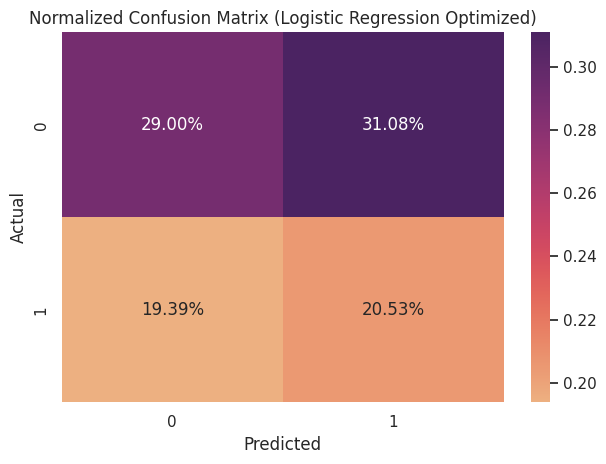

In [192]:
# 1. Valores comunes y configuración
c_values = np.logspace(-5, 5, 20)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 2. Definición del grid con combinaciones válidas
param_grid = [
    {'C': c_values, 'penalty': ['l1'], 'solver': ['liblinear', 'saga']},
    {'C': c_values, 'penalty': ['l2'], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
    {'C': c_values, 'penalty': ['elasticnet'], 'solver': ['saga'], 'l1_ratio': [0, 0.25, 0.5, 0.75, 1]},
    {'C': c_values, 'penalty': [None], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']}
]

# Define la métrica de evaluación (F1-score)
f1_scorer = make_scorer(f1_score)

# 3. Búsqueda de hiperparámetros
model = LogisticRegression(random_state=42, max_iter=1000,class_weight='balanced')
grid_search = GridSearchCV(model, param_grid, cv=cv, scoring=f1_scorer, n_jobs=-1)
grid_search.fit(x_train_res, y_train_res)

# 4. Resultados
print("Mejores hiperparámetros encontrados:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# 5. Evaluación sobre test set
y_pred_best = best_model.predict(x_test_selected)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
print('Classification Report:\n', classification_report(y_test, y_pred_best))

# 6. Visualización de la matriz de confusión
class_names = best_model.classes_
sns.heatmap(conf_matrix_best / np.sum(conf_matrix_best), annot=True, cmap="flare", fmt='.2%',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Logistic Regression Optimized)')
plt.tight_layout()
plt.show()

##Arbol de decision

Reporte de Clasificación: 
               precision    recall  f1-score   support

           0       0.60      0.60      0.60      2163
           1       0.40      0.41      0.40      1437

    accuracy                           0.52      3600
   macro avg       0.50      0.50      0.50      3600
weighted avg       0.52      0.52      0.52      3600



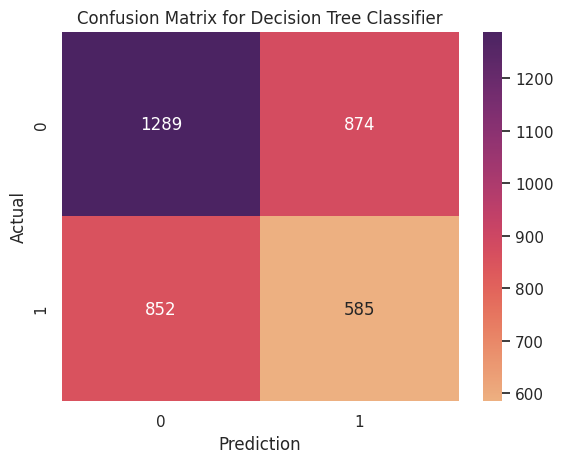

In [193]:
#Entrenamiento del modelo de Árbol de Decisiones
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train_res, y_train_res)

#Se realiza la predicción
y_pred = clf.predict(x_test_selected)

#Se evalua como performa el modelo:
print('Reporte de Clasificación: \n', classification_report(y_test,y_pred))

# Se visualiza la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
color = sns.color_palette("flare", as_cmap=True)
sns.heatmap(conf_matrix, annot=True, cmap=color, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

##Random Forest

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Reporte de Clasificación: 
               precision    recall  f1-score   support

           0       0.59      0.70      0.64      2163
           1       0.38      0.28      0.32      1437

    accuracy                           0.53      3600
   macro avg       0.49      0.49      0.48      3600
weighted avg       0.51      0.53      0.51      3600



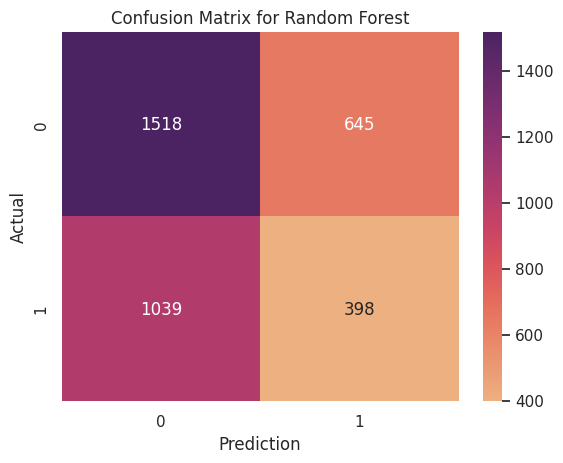

In [194]:
# Entrenar un modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train_res, y_train_res)

#Se realiza la predicción
y_pred = rf_model.predict(x_test_selected)

#Se evalua como performa el modelo:
print('Reporte de Clasificación: \n', classification_report(y_test,y_pred))

# Se visualiza la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
color = sns.color_palette("flare", as_cmap=True)
sns.heatmap(conf_matrix, annot=True, cmap=color, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

##XGBoost

Reporte de Clasificación: 
               precision    recall  f1-score   support

           0       0.60      0.82      0.70      2163
           1       0.41      0.19      0.26      1437

    accuracy                           0.57      3600
   macro avg       0.51      0.50      0.48      3600
weighted avg       0.53      0.57      0.52      3600



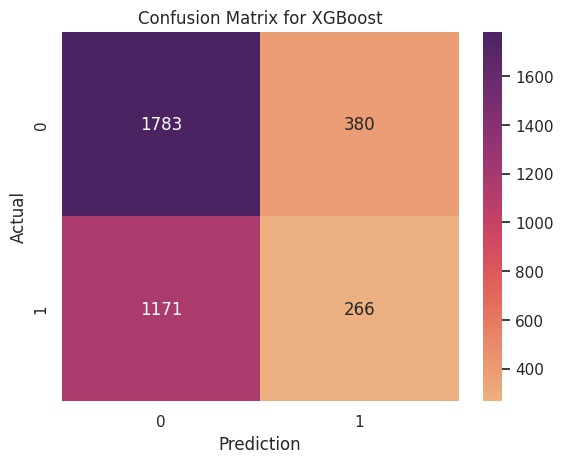

In [195]:
# Crear y entrenar el modelo XGBoost
model = XGBClassifier(
    n_estimators=100,      # Número de árboles
    learning_rate=0.1,     # Tasa de aprendizaje
    max_depth=3,           # Profundidad máxima
    min_child_weight=1,    # Mínimo peso de una hoja
    subsample=0.8,         # Fracción de muestras
    colsample_bytree=0.8,  # Fracción de características
    gamma=0                # Umbral de reducción en pérdida
)
model.fit(x_train_res, y_train_res)

#Se realiza la predicción
y_pred = model.predict(x_test_selected)

#Se evalua como performa el modelo:
print('Reporte de Clasificación: \n', classification_report(y_test,y_pred))

# Se visualiza la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
color = sns.color_palette("flare", as_cmap=True)
sns.heatmap(conf_matrix, annot=True, cmap=color, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost')
plt.show()

##Optimizacion con GridSearch


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Grid Search - Mejores Hiperparámetros: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 1, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 10, 'subsample': 0.8}
Grid Search - Mejor Score: 0.5514131591465239
Reporte de Clasificación: 
               precision    recall  f1-score   support

           0       0.60      0.54      0.57      2163
           1       0.40      0.47      0.43      1437

    accuracy                           0.51      3600
   macro avg       0.50      0.50      0.50      3600
weighted avg       0.52      0.51      0.52      3600



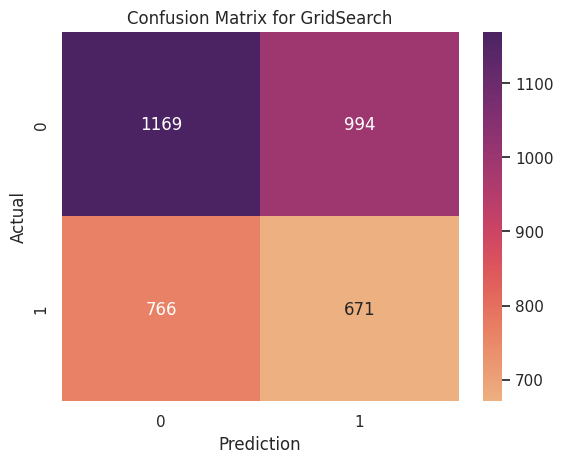

In [197]:
# Espacio de parámetros
param_grid = {
    "n_estimators": [1, 5, 10],
    "learning_rate":[0.1, 1, 10],
    "max_depth":[1,2],
    "min_child_weight":[1,2],
    "subsample":[0.4,0.8],
    "colsample_bytree":[0.4,0.8],
    "gamma":[0,1]
  }

# Grid Search
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(x_train_res, y_train_res)
print("Grid Search - Mejores Hiperparámetros:", grid_search.best_params_)
print("Grid Search - Mejor Score:", grid_search.best_score_)

# 1. Obtener el mejor modelo encontrado por GridSearchCV
best_model = grid_search.best_estimator_
# 2. Entrenar el mejor modelo con todos los datos de entrenamiento
best_model.fit(x_train_res, y_train_res)
# 3. Hacer predicciones en el conjunto de prueba
y_pred = best_model.predict(x_test_selected)
y_pred_proba = best_model.predict_proba(x_test_selected)[:, 1]  # Probabilidades para la clase positiva
#Se evalua como performa el modelo:
print('Reporte de Clasificación: \n', classification_report(y_test,y_pred))

# Se visualiza la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
color = sns.color_palette("flare", as_cmap=True)
sns.heatmap(conf_matrix, annot=True, cmap=color, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix for GridSearch')
plt.show()

##Optimizacion con Randomized Search

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Random Search - Mejores Hiperparámetros: {'subsample': 0.8, 'scale_pos_weight': 1.0, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0.2, 'colsample_bytree': 0.8}
Random Search - Mejor Score: 0.6102504425776901
Reporte de Clasificación: 
               precision    recall  f1-score   support

           0       0.60      0.54      0.57      2163
           1       0.40      0.47      0.43      1437

    accuracy                           0.51      3600
   macro avg       0.50      0.50      0.50      3600
weighted avg       0.52      0.51      0.52      3600



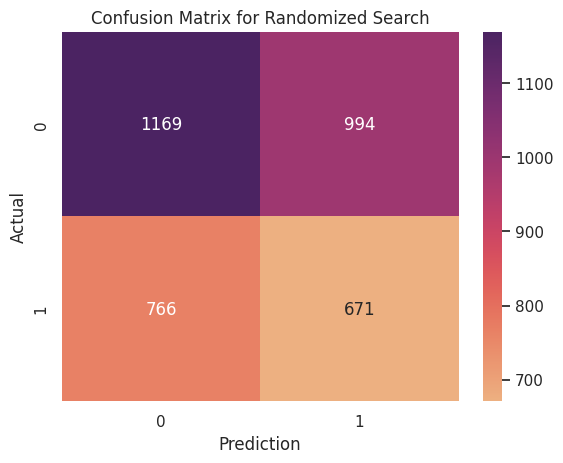

In [198]:
# Espacio de parámetros
scale = len(y_train_res[y_train_res == 0]) / len(y_train_res[y_train_res == 1])
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 1, 10],
    'n_estimators': [100, 200],
    'scale_pos_weight': [scale, scale + 1, scale + 2]
}

# Randomized Search
scale = len(y_train_res[y_train_res == 0]) / len(y_train_res[y_train_res == 1])
model = XGBClassifier(scale_pos_weight=scale)
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_grid,
    n_iter=1000,
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)
random_search.fit(x_train_res, y_train_res)
print("Random Search - Mejores Hiperparámetros:", random_search.best_params_)
print("Random Search - Mejor Score:", random_search.best_score_)

# 1. Obtener el mejor modelo encontrado por RandomizedSearch
best_model = grid_search.best_estimator_
# 2. Entrenar el mejor modelo con todos los datos de entrenamiento
best_model.fit(x_train_res, y_train_res)
# 3. Hacer predicciones en el conjunto de prueba
y_pred = best_model.predict(x_test_selected)
y_pred_proba = best_model.predict_proba(x_test_selected)[:, 1]  # Probabilidades para la clase positiva
sm = SMOTE(random_state=42)
x_res, y_res = sm.fit_resample(x_train_res, y_train_res)
#Se evalua como performa el modelo:
print('Reporte de Clasificación: \n', classification_report(y_test,y_pred))

# Se visualiza la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
color = sns.color_palette("flare", as_cmap=True)
sns.heatmap(conf_matrix, annot=True, cmap=color, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Randomized Search')
plt.show()

##MLP Classifier

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mejores hiperparámetros encontrados:
{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100, 50), 'learning_rate_init': 0.001}
Reporte de Clasificación: 
               precision    recall  f1-score   support

           0       0.60      0.48      0.53      2163
           1       0.40      0.51      0.44      1437

    accuracy                           0.49      3600
   macro avg       0.50      0.50      0.49      3600
weighted avg       0.52      0.49      0.50      3600



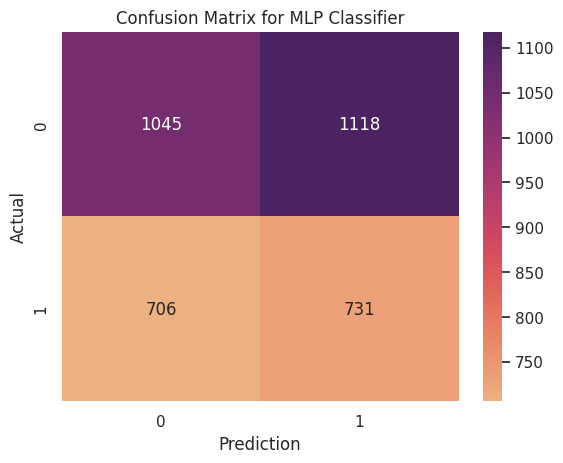

In [199]:

#Escalamiento de datos
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_res)
x_test_scaled = scaler.transform(x_test_selected)

# 2. Definir el clasificador base
mlp = MLPClassifier(max_iter=300, random_state=42)

# 3. Espacio de hiperparámetros a explorar
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001],
    'learning_rate_init': [0.001, 0.01]
}

# 4. Grid Search
grid_search = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(x_train_scaled, y_train_res)

# 5. Mejor modelo y evaluación
best_mlp = grid_search.best_estimator_

print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# 6. Predicción en test
y_pred = best_mlp.predict(x_test_scaled)
y_pred_proba = best_mlp.predict_proba(x_test_scaled)[:, 1]

#Se evalua como performa el modelo:
print('Reporte de Clasificación: \n', classification_report(y_test,y_pred))

# Se visualiza la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
color = sns.color_palette("flare", as_cmap=True)
sns.heatmap(conf_matrix, annot=True, cmap=color, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix for MLP Classifier')
plt.show()

##SVM

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM - Mejores hiperparámetros: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Reporte de Clasificación: 
               precision    recall  f1-score   support

           0       0.60      0.48      0.53      2163
           1       0.40      0.51      0.44      1437

    accuracy                           0.49      3600
   macro avg       0.50      0.50      0.49      3600
weighted avg       0.52      0.49      0.50      3600



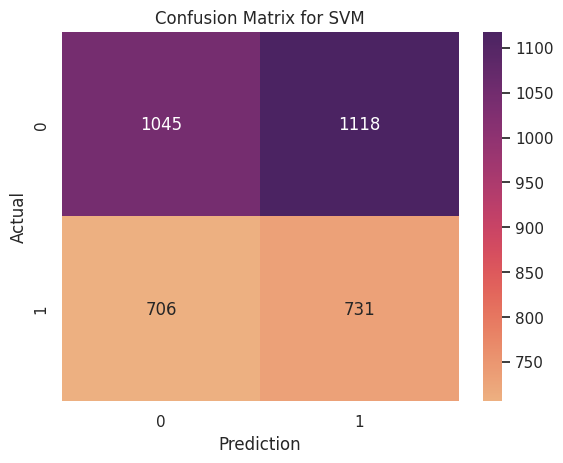

In [200]:
# Definir el modelo base
svm = SVC(probability=True)

# Hiperparámetros a explorar
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Grid Search
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, n_jobs=-1, verbose=1)
grid_search_svm.fit(x_train_scaled, y_train_res)

# Mejor modelo
best_svm = grid_search_svm.best_estimator_
print("SVM - Mejores hiperparámetros:", grid_search_svm.best_params_)

# Evaluación
y_pred_svm = best_svm.predict(x_test_scaled)
y_pred_proba_svm = best_svm.predict_proba(x_test_scaled)[:, 1]

#Se evalua como performa el modelo:
print('Reporte de Clasificación: \n', classification_report(y_test,y_pred))

# Se visualiza la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
color = sns.color_palette("flare", as_cmap=True)
sns.heatmap(conf_matrix, annot=True, cmap=color, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.show()

##KNN

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNN - Mejores hiperparámetros: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Reporte de Clasificación: 
               precision    recall  f1-score   support

           0       0.60      0.48      0.53      2163
           1       0.40      0.51      0.44      1437

    accuracy                           0.49      3600
   macro avg       0.50      0.50      0.49      3600
weighted avg       0.52      0.49      0.50      3600



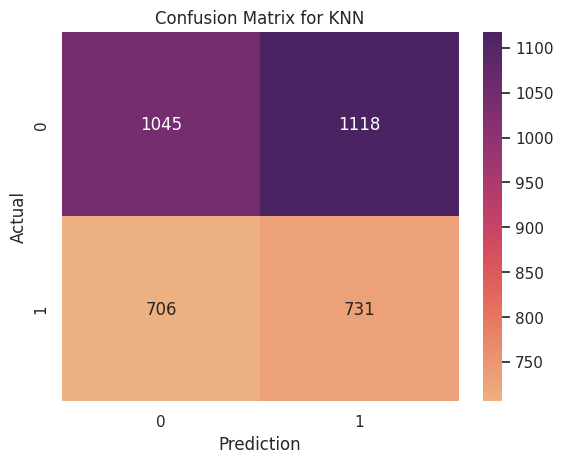

In [201]:
# Definir el modelo base
knn = KNeighborsClassifier()

# Hiperparámetros a explorar
param_grid_knn = {
    'n_neighbors': [5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Grid Search
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, n_jobs=-1, verbose=1)
grid_search_knn.fit(x_train_scaled, y_train_res)

# Mejor modelo
best_knn = grid_search_knn.best_estimator_
print("KNN - Mejores hiperparámetros:", grid_search_knn.best_params_)

# Evaluación
y_pred_knn = best_knn.predict(x_test_scaled)
y_pred_proba_knn = best_knn.predict_proba(x_test_scaled)[:, 1]
#Se evalua como performa el modelo:
print('Reporte de Clasificación: \n', classification_report(y_test,y_pred))

# Se visualiza la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
color = sns.color_palette("flare", as_cmap=True)
sns.heatmap(conf_matrix, annot=True, cmap=color, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN')
plt.show()